In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
print(measurement)

<class 'sqlalchemy.ext.automap.measurement'>


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [18]:
year_ago = dt.date(2017, 8, 23)-dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

Text(0, 0.5, 'Inches')

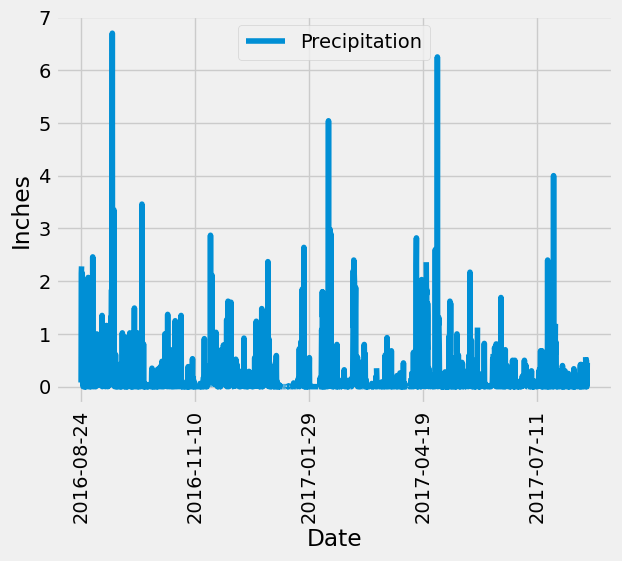

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23)-dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
p_score = session.query(measurement.date, measurement.prcp).filter(measurement.date > year_ago).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
p_score_df = pd.DataFrame(p_score, columns=['Date', 'Precipitation'])
p_score_df.set_index("Date")

# Sort the dataframe b
ps_df = p_score_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
ps_df.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")


In [56]:
# Use Pandas to calculate the summary statistics for the precipitation data
count =     p_score_df["Precipitation"].count()
mean =      p_score_df["Precipitation"].mean()
std_dev =   p_score_df["Precipitation"].std()
min =       p_score_df["Precipitation"].min()
first =     p_score_df["Precipitation"].quantile(q=[0.25])
second =    p_score_df["Precipitation"].quantile(q=[0.50])
third =     p_score_df["Precipitation"].quantile(q=[0.75])
max =       p_score_df["Precipitation"].max()

# Assemble the resulting series into a single summary DataFrame.
stats = pd.DataFrame({"count":count, "mean":mean, "std":std_dev, "min":min, 
                      "25%": first,
                      "50%": second,
                      "75%": third,
                      "max":max,
                   })
print(stats.T)

              0.25         0.50         0.75
count  2015.000000  2015.000000  2015.000000
mean      0.176462     0.176462     0.176462
std       0.460288     0.460288     0.460288
min       0.000000     0.000000     0.000000
25%       0.000000          NaN          NaN
50%            NaN     0.020000          NaN
75%            NaN          NaN     0.130000
max       6.700000     6.700000     6.700000


# Exploratory Station Analysis

In [60]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(station.name).count()
station_count

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

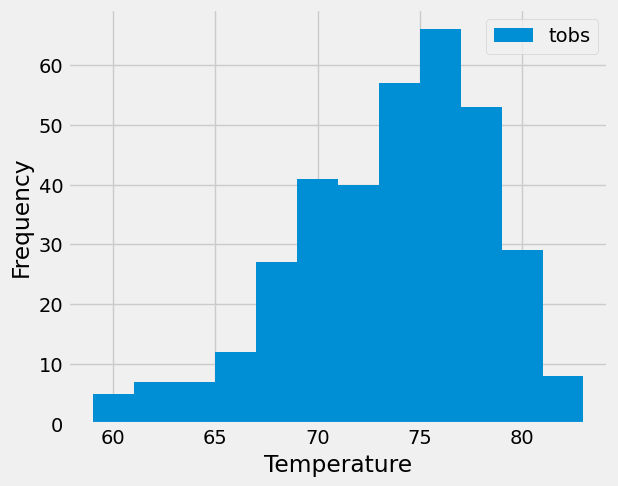

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()